## Fall 2019 Galaxy Research


Resources I would recommend:

- stackoverflow: https://stackoverflow.com/
- Geeksforgeeks: https://www.geeksforgeeks.org/

How to use a dictonary in python:
https://www.geeksforgeeks.org/python-dictionary/

Here's how to make a simple plot in python, and add a best fit line by using a linear regression:

In [24]:
#First I will define a function to return the plot.

def linefit():
    filename=("bestfitdata.txt") #this will work as long as the file by this name is in the same directory the notebook is, otherwise, a path must be defined

    fin = open(filename, 'r') #opens the file
    survey = np.loadtxt(fin) #reads in each column into an array

    x=survey[:, 0] #access all rows in the first (zeroth) column
    print(x)  #print x values

    y=survey[:,1]
    print(y)  #print y values

    plt.scatter(x,y, c="springgreen") #makes a scatter plot of the x and y values

    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) #makes the best fit line, and defines parameters associated with it
    line = slope*x+intercept
 
    plt.plot(line, "indigo") #plots the line
    plt.show

    #print(slope, intercept, r_value, p_value, std_err)

    print ('\n', "Slope = ",slope, '\n', "Intercept = ", intercept, '\n', "R Value = ", r_value, '\n', "P Value = ", p_value, '\n', "Standard Error = ", std_err)


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.]
[ 49.1893  54.8448  40.1114  26.1809  40.7383  71.9467  33.5833 131.364
  68.197  131.095   37.2666 189.868  125.03    99.6729 127.271  106.426
 153.886  153.381   94.8586 136.245  166.235  139.36   136.896  148.319
 144.289  172.145  204.599  178.184  207.157  268.206  197.244  291.271
 261.346  240.729  211.113  223.606  258.455  226.111  276.129  238.149 ]

 Slope =  5.864784559099437 
 Intercept =  37.154171097560976 
 R Value =  0.9048082642528359 
 P Value =  1.1503248629701274e-15 
 Standard Error =  0.4477431624496975


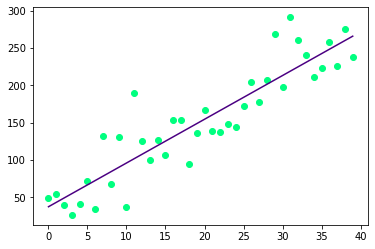

In [25]:
#First import these libraries
from matplotlib import pyplot as plt #used to make plots
import numpy as np #does a lot of math functions
from scipy import stats #need for the linear regression

#call the function
linefit()


Next we will define two functions to create a histogram with data from the GOGREEN survey, specifically from SpARCS-0035. The first will make a histogram of the k band magnitudes for all galaxies in that catalog, and the second function will do the same but after selecting galaxies with certain parameters. There are two quality flag parameters, both set to zero to select the cleanest data, and a magnitude cut off parameter, so that we select with positive fluxes. These parameter cuts were made using the numpy.where() command, which is worth learning! https://www.geeksforgeeks.org/numpy-where-in-python/

In [26]:
def makehistogram():
    #Reading in the file, naming it photom_cats
    filename=("SpARCS-0035_totalall_HAWKIKs.cat")
    fin = open(filename, 'r')
    photom_cats = np.loadtxt(fin)


    #Read in K band aperature flux:
    k_band_flux = np.array(photom_cats[:,10])
    #print ("K Band Flux: ", k_band_flux,'\n')

    #Make Positive Fluxes only
    pos_flux = np.where(k_band_flux>0)
    pos_flux = pos_flux[0]
    #print("Positive K Band Flux: ",k_band_flux[pos_flux],'\n')

    #Convert flux to mag, From the readme "m_filter = -2.5*log10(flux_filter) + 25."
    k_band_mag = -2.5*(np.log10(k_band_flux[pos_flux]))+25
    #print ("K Band Magnitude: ",k_band_mag, '\n')
    ks = k_band_mag
    #print(ks[:20])

    binwidth = .5 #This was chosen arbitrarily, its a range in magnitude for each bin
    #plt.hist(ks, bins=100, facecolor='g')  # this makes 100 bins of equal width
    #plt.hist(ks, bins=range(min(ks), max(ks) + binwidth, binwidth))  <--- nope, only for integers
    plt.hist(ks, bins=np.arange(min(ks), max(ks) + binwidth, binwidth))
    plt.xlabel('Magnitude')
    plt.title('Ks Band')
    
def makegoodhistogram():
    #Reading in the file, naming it photom_cats
    filename=("SpARCS-0035_totalall_HAWKIKs.cat")
    fin = open(filename, 'r')
    photom_cats = np.loadtxt(fin)

    #Read in K band aperature flux:
    k_band_flux = np.array(photom_cats[:,10])
    #print ("K Band Flux: ", k_band_flux,'\n')
    #Getting good photometry:
    totmask = np.array(photom_cats[:,9]) # Read in mask quality flag
    kflag = np.array(photom_cats[:,6])   # Read in k band quality flag
    #Make Positive Fluxes only
    pos_flux = np.where(k_band_flux>0)
    pos_flux = pos_flux[0]
    #print("Positive K Band Flux: ",k_band_flux[pos_flux],'\n')

    #Convert flux to mag, From the readme "m_filter = -2.5*log10(flux_filter) + 25."
    k_band_mag = -2.5*(np.log10(k_band_flux[pos_flux]))+25
    #print ("K Band Magnitude: ",k_band_mag, '\n')
    ks = k_band_mag

    quality_ks = np.where((totmask == 0) & (kflag == 0) & (k_band_flux>0)) 
    quality_ks = quality_ks[0]
    #print(k_band_flux[quality_ks])  #the k band flux with good photometry
    quality_ks_flux = k_band_flux[quality_ks]
    quality_ks_mag = -2.5*(np.log10(quality_ks_flux))+25
    #print(quality_ks_mag)
    qks = quality_ks_mag

    binwidth = .5 #This was chosen arbitrarily, its a range in magnitude for each bin

    plt.hist(qks, bins=np.arange(min(ks), max(ks) + binwidth, binwidth), color = 'mediumslateblue')
    plt.xlabel('Magnitude')
    plt.title('Ks Band')

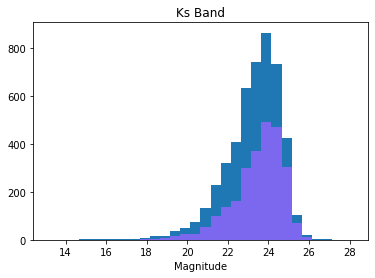

In [27]:
makehistogram()

makegoodhistogram()

Note the cut off on the right side of the above plot: ____________

Next we will make a plot of the K band magnitude versus the V band magnitude for the same catalog. This is useful for thinking about the color of galaxies in the survey. Galaxies in this plot will have the same parameter checks as above, but not the magnitude cut.

In [28]:

def scatterplotmake():


    #Reading in the file, naming it photom_cats
    filename=("SpARCS-0035_totalall_HAWKIKs.cat")
    fin = open(filename, 'r')
    photom_cats = np.loadtxt(fin)

        #Checking some things
        #ID=photom_cats[:11, 0]
        #print("ID: ",ID,'\n')
        #ra=photom_cats[:11,1]
        #print("RA: ",ra,'\n')   
        #dec=photom_cats[:11, 2]
        #print("DEC: ",dec,'\n')

        #Read in V band aperature flux:
    v_band_flux = np.array(photom_cats[:,16])
        #print ("V Band Flux: ", v_band_flux,'\n')
        #Read in K band aperature flux:
    k_band_flux = np.array(photom_cats[:,10])
        #print ("K Band Flux: ", k_band_flux,'\n')

        #Make Positive Fluxes only
    pos_flux = np.where((v_band_flux>0) & (k_band_flux>0))
    pos_flux = pos_flux[0]
        #print("Positive V Band Flux: ",v_band_flux[pos_flux],'\n')
        #print("Positive K Band Flux: ",k_band_flux[pos_flux],'\n')

        #Convert flux to mag, From the readme "m_filter = -2.5*log10(flux_filter) + 25."
    v_band_mag = -2.5*(np.log10(v_band_flux[pos_flux]))+25
        #print ("V Band Magnitude: ",v_band_mag, '\n')
    k_band_mag = -2.5*(np.log10(k_band_flux[pos_flux]))+25
        #print ("K Band Magnitude: ",k_band_mag, '\n')


        #Making the scatter plot
    plt.xlabel('V Band Magnitude', size = '25')
    plt.ylabel('K Band Magnitude' , size = '25')
        #plt.title('', size = '25')
    plt.scatter(v_band_mag,k_band_mag, c="steelblue", alpha=0.1)
    plt.show

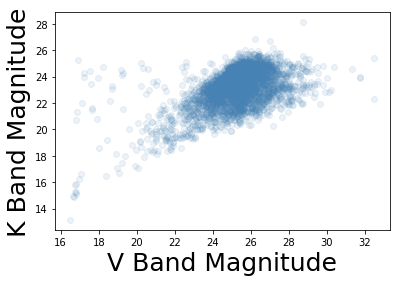

In [29]:
#call the function
scatterplotmake()

Next we define a function to __________________. It will then print the transmission versus the wavelength of the u filter. This function could be improved by having it take in a parameter choosing a filter, and returning this transmission curve for any filter, instead of just for the u band. 

In [30]:
def filtercurves():
    #Take in file name:
    filename=("FILTER.RES.GOGREEN")

    #Getting the number of rows to read in for the u filter:
    urows=np.loadtxt(filename,dtype='U', max_rows=1) #max_rows=1 makes it read the first row of the text file only
    maxrows = int(urows[0]) #this converts the number from a string to an integer
    #print(maxrows) #Will be 128
    #Read the file again to get the wavelength and transmission for the u filter:
    u=np.loadtxt(filename,dtype='U',skiprows=1, max_rows=maxrows) #skiprows=1 to skip the first row, max_rows=maxrows to read in the first 128 rows

    #g filter:
    skip = maxrows+1
    grows=np.loadtxt(filename,dtype='U',skiprows=skip, max_rows=1)
    maxgrows = int(grows[0])
    print(maxgrows)
    skip = skip+1
    g=np.loadtxt(filename,dtype='U',skiprows=skip, max_rows=maxgrows)
    gwl = np.array(g[:,1])
    gwl = gwl.astype(np.float) #Converts from an array of strings to an array of floats
    #u filter transmission, let this be y values
    gt = np.array(g[:,2])
    gt = gt.astype(np.float)

    #u filter wavelength, let this be x values
    uwl = np.array(u[:,1])
    uwl = uwl.astype(np.float) #Converts from an array of strings to an array of floats
    #u filter transmission, let this be y values
    ut = np.array(u[:,2])
    ut = ut.astype(np.float)
    #Multiple of wavelength and transmission, for numerator integral
    mult = uwl*ut

    #To find effective wavelength:
    num = np.trapz(mult, x=uwl)
    denom = np.trapz(ut, x=uwl)

    #Effective u band wavelength:
    eff_u = num/denom
    print("Effective u filter wavelength is ",eff_u, '\n')

    #Making a plot of the transmission vs wavelength to check that the calculated wavelength is right, but also for fun
    plt.xlabel('Wavelength', size = '25')
    plt.ylabel('Transmission' , size = '25')
    plt.title('Finding Effective Wavelength', size = '20')
    plt.scatter(uwl, ut, c="indigo")
    plt.show

237
Effective u filter wavelength is  3832.3584682195014 



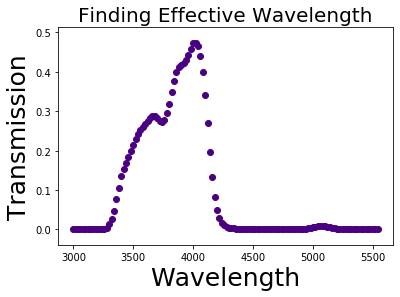

In [31]:
filtercurves()

In [33]:
#import this function. It was written in spyder as a stand alone module. It's identical to the function above that finds
#effective wavelengths, but it doesn't plot anything, and it returns the effective wavelength for each filter as an array
from Finding_Effective_Wavelengths import finding_eff_waves
#need this to use ascii.read later
from astropy.io import ascii


#Read in files
path = r'''C:\Users\Anna\Learning-Python-master'''
zfile = path + r'''\compilation_SpARCS-0035.dat'''
zdat = ascii.read(zfile)
photfile = path + r'''\SpARCS-0035_totalall_HAWKIKs.cat'''
photdat = ascii.read(photfile)


In [35]:
#Parametrize

#good_flux corresponds to k band mag < 23
good_flux = 10**0.8
#Parameters for good photometry, redshift, and flux
izspec = np.where((zdat['spec_z'] > 0) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (photdat['HAWKIKs'] > good_flux))
izspec = izspec[0]

#this prints the rows of the two tables that correspond to these indices
#print(photdat['id'][izspec],zdat['PHOTCATID'][izspec],zdat['spec_z'][izspec])

eff_wave = finding_eff_waves() #eff_wave is in angstroms
g_wave = eff_wave['HAWKIKs'],eff_wave['VIMOSU'],eff_wave['VIMOSB'],eff_wave['VIMOSV'],eff_wave['VIMOSR'],eff_wave['VIMOSI'],eff_wave['DECamz'],eff_wave['FOURSTARJ1'],eff_wave['HAWKIJ']
#print(g_wave)

#Getting flux in each filter for 5 galaxies
#filt_names = HAWKIKs,VIMOSU,VIMOSB,VIMOSV,VIMOSR,VIMOSI,DECamz,FOURSTARJ1,HAWKIJ
g = [1202,2226,3115,4444,4811] #indices for 5 random galaxies
#Catalog fluxes:
fnu = np.zeros((5,9), dtype=float)
for i in range(len(g)):
    fnu[i] = photdat['HAWKIKs'][g[i]],photdat['VIMOSU'][g[i]],photdat['VIMOSB'][g[i]],photdat['VIMOSV'][g[i]],photdat['VIMOSR'][g[i]], photdat['VIMOSI'][g[i]], photdat['DECamz'][g[i]],photdat['FOURSTARJ1'][g[i]],photdat['HAWKIJ'][g[i]]
        #print(photdat['HAWKIKs'][g[i]])

#Finding fnu from the catalog flux, which is a ratio of fnu over f(m=25)
f = (fnu*.3631)*(10**-6)*(10**-23) # *.3631 to convert from ratio to uJy, *10^-6 to convert to Jy, *10^-23 to convert to ergs/s/cm^2/Hz

#Converting to flambda
flambda = f #placeholder values
for i in range(len(f)):
    for j in range(len(f[i])):
        flambda[i][j] = (f[i][j]*(2.99)*(10**10)*(10**8))/(g_wave[j]**2) #should give flambda in erg/s/cm^2/A
#print(flambda)
#print((max(flambda[0]) - min(flambda[0]) ) /10)

Now we will finally plot some SED's! First we will plot the observed wavelength.

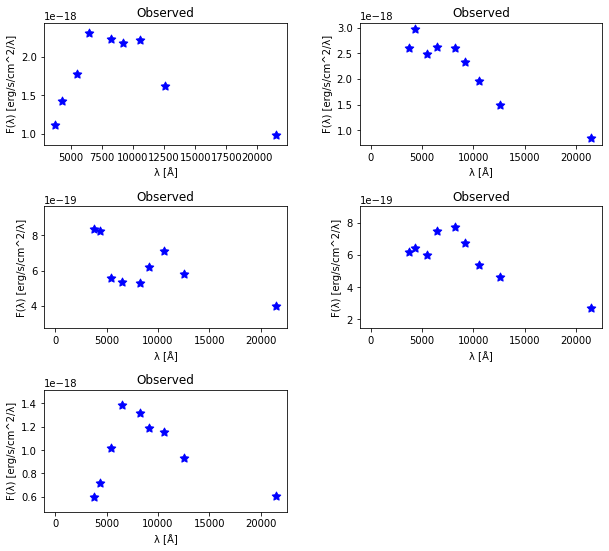

In [37]:
#Flambda Plots
plt.figure(figsize=(10,9))
plt.subplot(321)
plt.scatter(g_wave, flambda[0], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[0]) - 1.3e-19, max(flambda[0]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2/\u03BB]")
plt.title("Observed")

plt.subplot(322)
plt.scatter(np.log10(g_wave), np.log10(flambda[1]*g_wave), s=80, c='b', marker=(5,1))
plt.scatter(g_wave, flambda[1], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[1]) - 1.3e-19, max(flambda[1]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2/\u03BB]")
plt.title("Observed")

plt.subplot(323)
plt.scatter(np.log10(g_wave), np.log10(flambda[2]*g_wave), s=80, c='b', marker=(5,1))
plt.scatter(g_wave, flambda[2], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[2]) - 1.3e-19, max(flambda[2]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2/\u03BB]")
plt.title("Observed")

plt.subplot(324)
plt.scatter(np.log10(g_wave), np.log10(flambda[3]*g_wave), s=80, c='b', marker=(5,1))
plt.scatter(g_wave, flambda[3], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[3]) - 1.3e-19, max(flambda[3]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2/\u03BB]")
plt.title("Observed")

plt.subplot(325)
plt.scatter(np.log10(g_wave), np.log10(flambda[4]*g_wave), s=80, c='b', marker=(5,1))
plt.scatter(g_wave, flambda[4], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[4]) - 1.3e-19, max(flambda[4]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2/\u03BB]")
plt.title("Observed")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Next we will calculate the restframe wavelength and plot restframe SED's

In [38]:
#Calculating restframe wavelengths
z = zdat['spec_z']
redshift = z[1202],z[2226],z[3115],z[4444],z[4811]

rest_wave = np.zeros((5,9))
rest_wave = np.array(rest_wave)
for i in range(len(redshift)):
    rest_wave[i] = g_wave / (1+redshift[i])
print(rest_wave[0])


rest_wave_1202 = g_wave / (1+z[1202])
rest_wave_2226 = g_wave / (1+z[2226])
rest_wave_3115 = g_wave / (1+z[3115])
rest_wave_4444 = g_wave / (1+z[4444])
rest_wave_4811 = g_wave / (1+z[4811])

[14042.53719268  2450.45508506  2827.88403623  3580.88689354
  4239.1169008   5369.91218644  5999.67221812  6896.36661891
  8224.78701221]


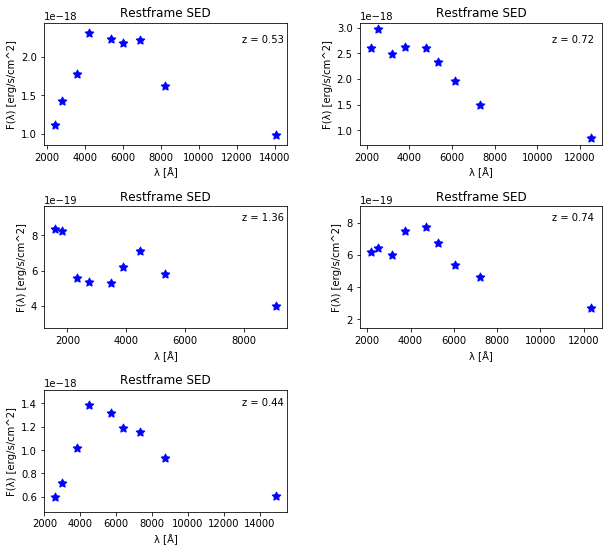

In [39]:
#Restframe Plots
plt.figure(figsize=(10,9))

plt.subplot(321)
plt.scatter(rest_wave_1202,(flambda[0]), s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[0]) - 1.3e-19, max(flambda[0]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2]")
plt.figtext(.4, .85, "z = %1.2f" % z[1202])
plt.title("Restframe SED")

plt.subplot(322)
plt.scatter(rest_wave_2226, flambda[1], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[1]) - 1.3e-19, max(flambda[1]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2]")
plt.figtext(.83, .85, "z = %1.2f" % z[2226])
plt.title("Restframe SED")

plt.subplot(323)
plt.scatter(rest_wave_3115, flambda[2], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[2]) - 1.3e-19, max(flambda[2]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2]")
plt.figtext(.4, .575, "z = %1.2f" % z[3115])
plt.title("Restframe SED")

plt.subplot(324)
plt.scatter(rest_wave_4444, flambda[3], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[3]) - 1.3e-19, max(flambda[3]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2]")
plt.figtext(.83, .575, "z = %1.2f" % z[4444])
plt.title("Restframe SED")

plt.subplot(325)
plt.scatter(rest_wave_4811, flambda[4], s=80, c='b', marker=(5,1))
plt.ylim(min(flambda[4]) - 1.3e-19, max(flambda[4]) + 1.3e-19)
plt.xlabel("\u03BB [\u212B]")
plt.ylabel("F(\u03BB) [erg/s/cm^2]")
plt.figtext(.4, .29, "z = %1.2f" % z[4811])
plt.title("Restframe SED")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()